In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# post-hoc
predictions = np.load('../processed_data/predict_video_2.npy')
# real-time 
onset_times = np.load('../processed_data/onset_times_video_2.npy')

In [5]:
stim_on = 2
# in seconds, when did the animal perform behavior 2
behavior_times = np.where(predictions==stim_on)[0]/10
behavior_times

array([  1.1,   2.1,   2.2,   2.3,   2.4,   3.8,   3.9,   4.7,   4.8,
         4.9,   5. ,   5.1,  12.7,  12.8,  13.2,  13.3,  13.4,  13.5,
        13.6,  13.7,  13.8,  13.9,  14. ,  14.1,  14.2,  14.3,  14.4,
        14.5,  32.2,  33.5,  33.9,  36.7,  80.2,  80.3,  80.4,  80.5,
        80.6,  80.7,  80.9,  81. ,  83.2,  83.3,  83.4,  83.5,  83.6,
        83.7,  85.6,  85.8,  86. ,  86.1,  86.2,  86.3,  86.4,  86.5,
        86.6,  86.7,  86.8,  94.5,  94.6,  94.7,  95.9,  96. ,  96.3,
        96.4,  96.5,  96.6,  96.7,  96.9,  97. ,  97.3,  97.5,  97.6,
        97.7,  98.9,  99. ,  99.1,  99.2,  99.3,  99.7,  99.9, 100.2,
       100.3, 100.4, 100.5, 100.6, 100.7, 107.5, 107.6, 107.7, 107.8,
       107.9, 108. , 108.1, 108.2, 108.3, 108.4, 108.5, 108.6, 108.7,
       108.8, 117.8, 119. , 119.1, 119.2, 119.3, 119.4, 119.5, 119.6,
       119.7, 119.8, 119.9, 120.6, 120.7, 120.8, 124.1, 124.2, 124.3,
       124.4, 124.5, 124.6, 124.7, 124.8, 124.9, 125. , 125.1, 125.2,
       125.3, 127.3,

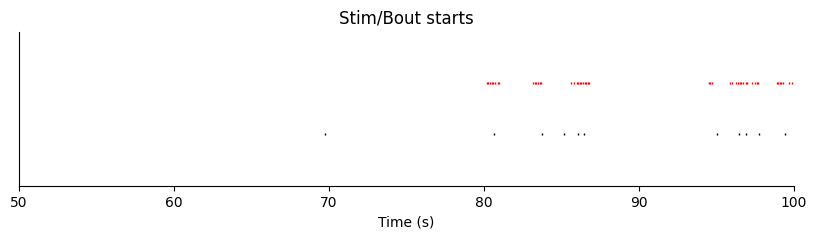

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
ax.plot(onset_times,
        np.ones_like(onset_times),
        ls='', marker='|', markersize=1, c='k', alpha=1)
ax.plot(behavior_times,
        np.ones_like(behavior_times)+0.5,
        ls='', marker='|', markersize=1, c='r', alpha=1)
ax.set_yticks([])
ax.set_ylim([0.5, 2])
ax.set_xlim([50, 100])
ax.set_title('Stim/Bout starts')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
plt.show()

In [20]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
num_behaviors_post = np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)[1][stim_on]

if len(onset_times)<num_behaviors_post:
    print(f'this session matched behavior {stim_on} *** {len(onset_times)/num_behaviors_post*100}% of the time')
else:
    print(f'this session matched behavior {stim_on} *** {num_behaviors_post/len(onset_times)*100}% of the time')


this session matched behavior 2 *** 89.70588235294117% of the time
